<a href="https://colab.research.google.com/github/ketanp23/scsd-ddm-class/blob/main/AUCROCcurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

Using an 80-20 split ratio, the algorithm creates artificial binary classification data with 20 features, divides it into training and testing sets, and assigns a random seed to ensure reproducibility.

In [2]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

To train the Logistic Regression model we use a fixed random seed to get the same results every time we run the code.

First we train a logistic regression model using the training data.

In [3]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Using the test data and a trained Logistic Regression model the code predicts the positive class's probability.

In [4]:
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]

Using the test data the code creates a DataFrame called test_df with columns labeled "True," "Logistic"," add true labels and predicted probabilities from Logistic Regression model.

In [5]:
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic})

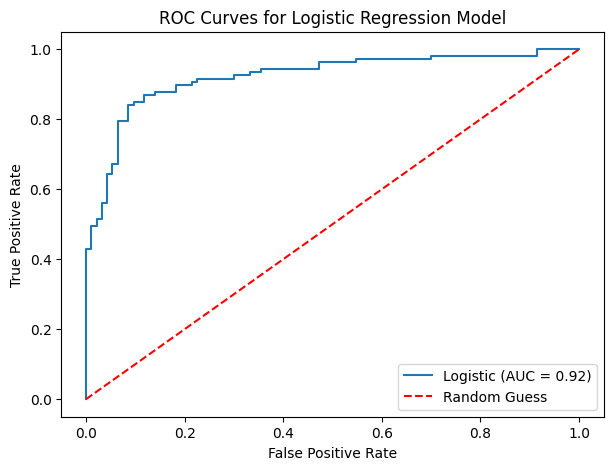

In [6]:
plt.figure(figsize=(7, 5))

for model in ['Logistic']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression Model')
plt.legend()
plt.show()

The plot computes the AUC and ROC curve for the model i.e Logistic Regression, then plots the ROC curve. The ROC curve for random guessing is also represented by a red dashed line, and labels, a title, and a legend are set for visualization.

Model Performance with AUC-ROC:

High AUC (close to 1): The model effectively distinguishes between positive and negative instances.
Low AUC (close to 0): The model struggles to differentiate between the two classes.
AUC around 0.5: The model doesn’t learn any meaningful patterns i.e it is doing random guessin
